<a href="https://colab.research.google.com/github/nickshen07/web/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ENGG1004 Digital Literacy and Computational Thinking - R
### Course Project
### I declare that the project here submitted is original except for source material explicitly acknowledged, and that the same or closely related material has not been previously submitted for another course. I also acknowledge that I am aware of University policy and regulations on honesty in academic work, and of the disciplinary guidelines and procedures applicable to breaches of such policy and regulations, as contained in the website.
### University Guideline on Academic Honesty:
### https://www.cuhk.edu.hk/policy/academichonesty/
### Student Name :
### Student ID :
### Class/Section : ENGG1004A
### Date : 2/12/2025

# Overview and Description of my Work:

#TASK 3.1 Describe my work:

In this project, I analyze the quality of sleep in different groups of people.

Sleep is important to human's daily life. However, many people nowadays are struggling to sleep or have low sleep quality without knowing the reasons behind. Therefore, this project aims to find out what affects the sleeping quality and help people to improve their sleep.  

# TASK 3.2 Data retrieval:
Worksheet RawData is downloaded from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Dataset "ProcessedData.csv" is downloaded from Worksheet ProcessedData

# TASK 3.3 Data processing:


First, I duplicate Worksheet RawData to Worksheet ProcessedData and do the remaining work in Worksheet ProcessedData. I deleted columns of attributes "Person ID", "Gender", "Occupation" as they are not the focus aspect of this study.

Second, I performed sorting to show the quality of sleep from lowest to highest. This helps me to identify the relationship between the quality of sleep and other factors more easily.

Third, I defined a new field "New BMI" to avoid duplicate values of "Normal" and "Normal Weight" in the field "BMI Categary".

Forth, I filtered "Obese" value in the "New BMI" field as the number of the related records is too small.

# TASK 3.4 Data summarization:

In Worksheet Summarization, cell A11:E11, I calculated the mean of sleep duration, number, minimum and maximum value of quality of sleep of different age groups. The age group is distributed as [20, 25), [25, 30), [30, 35), ..., and so on.


# TASK 3.5 Data visualization:


I ploted some graphs in Worksheet Visualization for simple analysis.

Below code displays a plot graph with sleep quality score against sleep duration. As shown from the bestfit line, there is a trend that the length of the sleep duration has a positive relationship with the sleep quality.

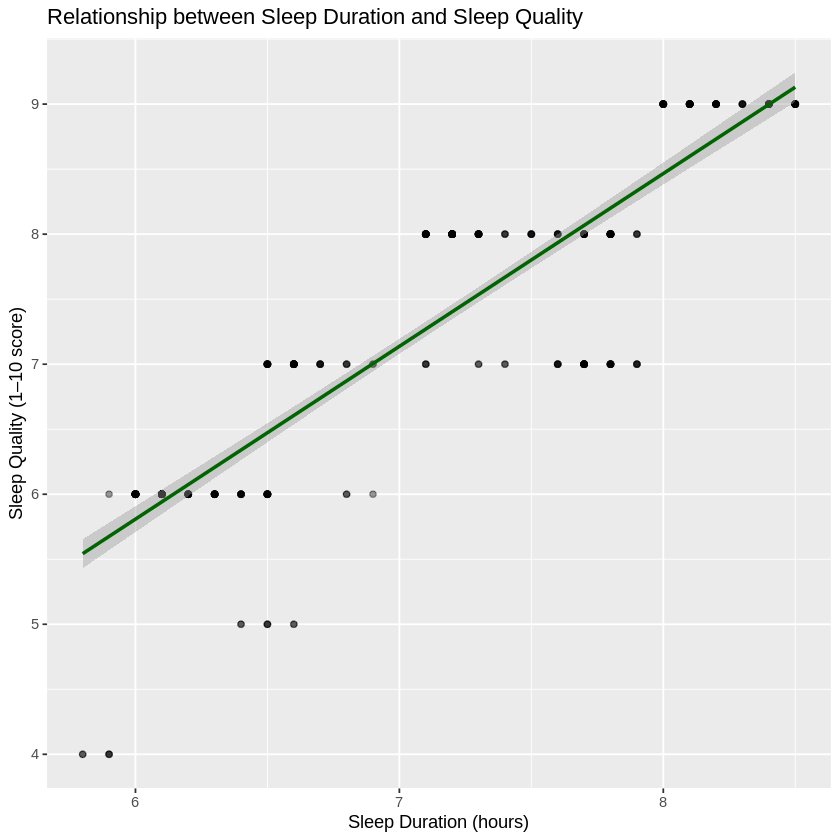

In [7]:
library(tidyverse)

f <- "ProcessedData.csv"

dur_qua <- read_csv(f, show_col_types = FALSE) %>%
  rename(
    SleepDuration = `Sleep Duration`,
    SleepQuality  = `Quality of Sleep`
  )

ggplot(dur_qua, aes(x = SleepDuration, y = SleepQuality)) +
  geom_point(alpha = 0.4) +
  geom_smooth(formula = y ~ x, method = "lm", se = TRUE, color = "darkgreen") +
  labs(
    title = "Relationship between Sleep Duration and Sleep Quality",
    x = "Sleep Duration (hours)",
    y = "Sleep Quality (1–10 score)"
  )


Below code displays a column chart of the proportion of sleep disorders by BMI Category. The vertical axis shows the proportion of individuals and the horizontal axis shows the type of BMI category. As shown from the chart, most normal weight people do not have sleep disorder, while most overweight or obese people would have a huge chance to be diagnosed with Insonia or Sleep Apnea.

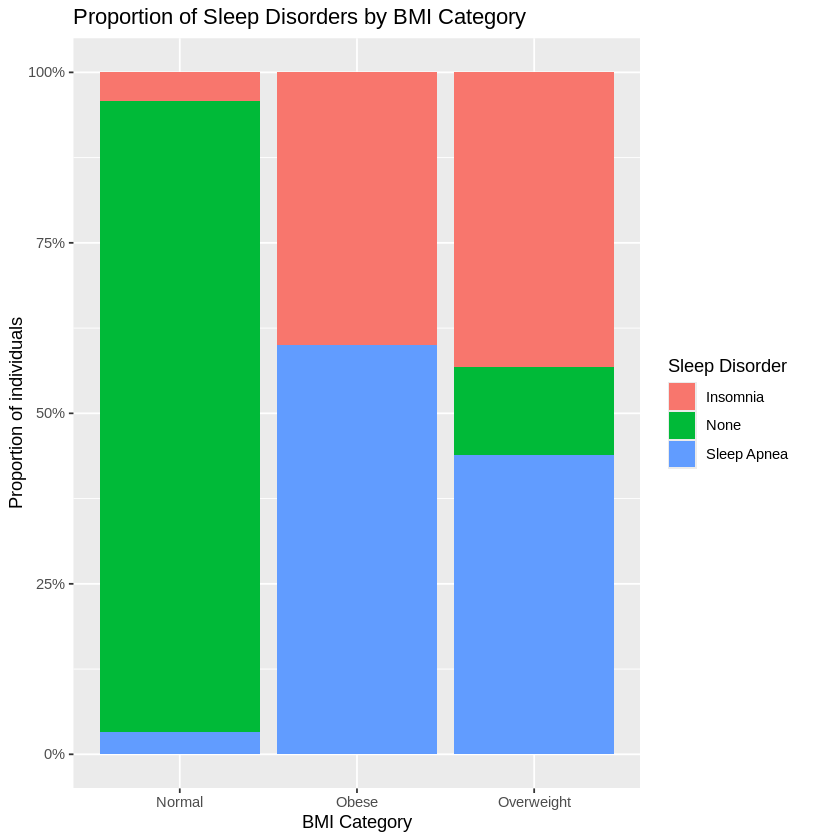

In [5]:
proportion <- read_csv(f, show_col_types = FALSE) %>%
  rename(
    BMICategory   = `New BMI`,
    SleepDisorder = `Sleep Disorder`
  )

ggplot(proportion, aes(x = BMICategory, fill = SleepDisorder)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Proportion of Sleep Disorders by BMI Category",
    x = "BMI Category",
    y = "Proportion of individuals",
    fill = "Sleep Disorder"
  )


Below code displays a plot graph of sleep duration and daily steps. As the best fit line is nearly horizontal, there is no direct relationship between the daily steps and sleep duration.

[1] "10 invididuals have less than 4000 daily steps."


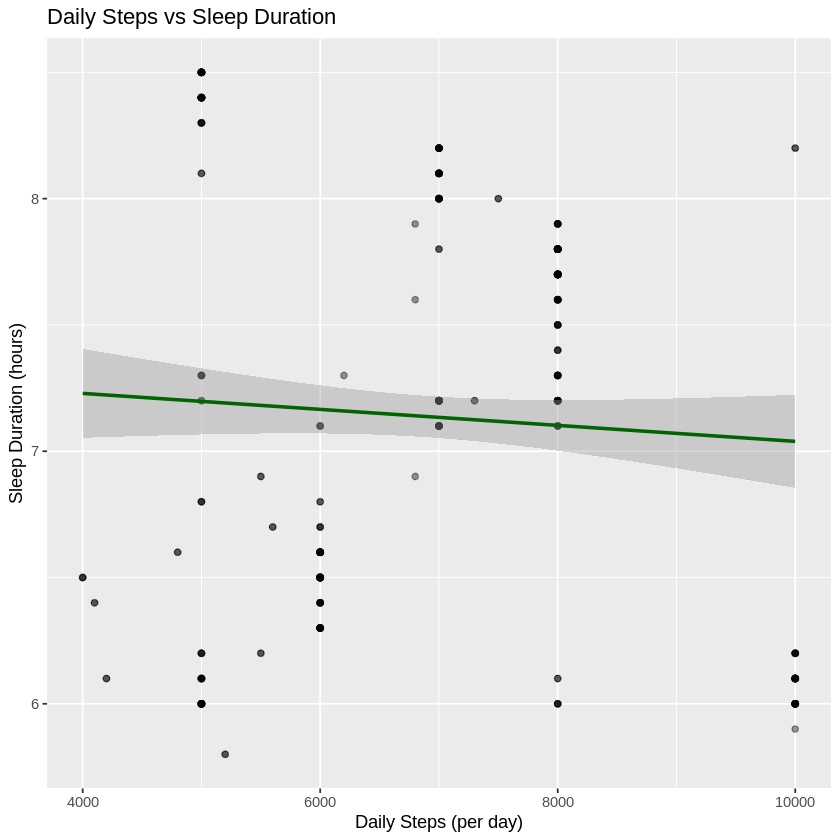

In [12]:
step_dur <- read_csv(f, show_col_types = FALSE) %>%
  rename(
    SleepDuration = `Sleep Duration`,
    DailySteps    = `Daily Steps`
  )

valid <- list()
cnt <- 1
cnt2 <- 0

for (i in 1:nrow(step_dur)) {
  cur <- step_dur$DailySteps[i]
  if (cur >= 4000) {
    valid[[cnt]] <- step_dur[i, ]
    cnt <- cnt + 1
  } else {
    cnt2 <- cnt2 + 1
  }
}

print(paste0(cnt2, " invididuals have less than 4000 daily steps."))

step_dur_fil <- bind_rows(valid)

ggplot(step_dur_fil, aes(x = DailySteps, y = SleepDuration)) +
  geom_point(alpha = 0.4) +
  geom_smooth(formula = y ~ x, method = "lm", se = TRUE, color = "darkgreen") +
  labs(
    title = "Daily Steps vs Sleep Duration",
    x = "Daily Steps (per day)",
    y = "Sleep Duration (hours)"
  )


# TASK 3.7 Computational tools:


In Worksheet ProcessedData, I created a new field called "Processed BMI" and filled in the formula `=IF($F2="Normal Weight", "Normal", $F2)` in cell K2 and copied it into the remaining cells of column K. This helps combine values of "Normal Weight" and "Normal" together with "Normal" in field "BMI Categary".

In Worksheet Summarization A1:E11, I filled in the boundaries of different age group in A2:A11 (from 20 to 65).

I wrote a formula `=IFERROR(AVERAGEIFS(ProcessedData!$B$2:$B$375, ProcessedData!$A$2:$A$375, ">="&A2, ProcessedData!$A$2:$A$375, "<"&A3), "N/A")` in B3, then copied to B4:B11. B4 stores the mean value of sleep duration of age group between 25 (equals cell A3)and 29 (less than cell A4), and so on. If there is no individual in the selected age group, the cell displays "N/A"

I wrote a formula `=COUNTIFS(ProcessedData!$A$2:$A$375, ">="&A2, ProcessedData!$A$2:$A$375, "<"&A3)` in C3, then copied to C4:C11. C4 stores the number of individuals in age group between 25 (equals cell A3) and 29 (less than cell A4), and so on.

I wrote a formula `=MINIFS(ProcessedData!$C$2:$C$375, ProcessedData!$A$2:$A$375, ">="&A2, ProcessedData!$A$2:$A$375, "<"&A3)` in D3, then copied to D4:D11. D4 stores the minimum value of the sleep quality in age group between 25 (equals cell A3) and 29 (less than cell A4), and so on.

I wrote a formula `=MAXIFS(ProcessedData!$C$2:$C$375, ProcessedData!$A$2:$A$375, ">="&A2, ProcessedData!$A$2:$A$375, "<"&A3)` in E3, then copied to E4:E11. E4 stores the maximum value of the sleep quality in age group between 25 (equals cell A3) and 29 (less than cell A4), and so on.

In Worksheet Summarization A14:B17, I filled in types of sleep disorder in A15:A17.

I wrote a formula `=COUNTIFS(ProcessedData!J:J, "="&A15)` in B15, then copied to B16:B17. B15 stores number of individuals with disorder described in A15, and so on.

In this Jupyter Notebook, I used selection statement if-else and repetition statement for in the last program of Task 3.5 to filter out individuals with less than 4000 daily steps.

# TASK 3.8 Summary:
You may add more worksheets… Describe your work here…

# TASK 3.9 Citations and references:
You may add a worksheet to list the items in Chicago style.